In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy import constants, units
from astropy.visualization import quantity_support

In [2]:
CI,CII,CIIs = 15.60, 17.80, 14.90

In [3]:
CI_CII = 10**(CI-CII)
CIIs_CII = 10**(CIIs-CII)
CI_CII

0.006309573444801917

In [4]:
T = np.logspace(1,3,20000) * units.K
T2 = T /(100 * units.K)
# n_e_1 = CI_CII / 4.5e-2 * T2**0.6 / units.cm**3
n_e_1 = CI_CII / (9.5e-12 * (100*units.K)**0.6 / 2.1e-10) * T**0.6 / units.cm**3

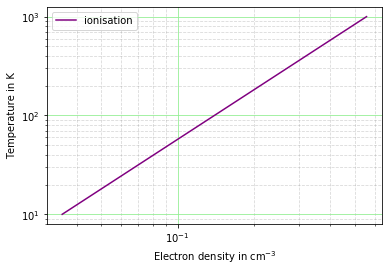

In [5]:
with quantity_support():
    plt.plot(n_e_1,T,label='ionisation',c='purple')
    plt.xscale('log')
    plt.yscale('log')
    plt.minorticks_on()
    plt.grid(b=False, which='major', color='lightgreen', linestyle='-')
    plt.grid(b=False, which='minor', color='gray', linestyle='--',alpha=0.3)
    plt.xlabel("Electron density in cm$^{-3}$")
    plt.ylabel("Temperature in K")
    plt.legend()
    plt.savefig('prob-3-plot-1.pdf',bbox_inches='tight')

In [6]:
Q12e = 7.8e-6 * np.exp(-91.27*units.K/T) * (T/units.K)**-.5 * units.cm**3 / units.s
Q12H = 1.3e-9 * np.exp(-91.27*units.K/T) * units.cm**3 / units.s
GamUV = 9.3e-11 / units.s
T_CMB = 2.73 * units.K
A21 = 2.291e-6 / units.s
GamR = A21/(np.exp(91.27 * units.K/T_CMB)-1)
n_e_2 = (CIIs_CII * A21 - GamR - GamUV) / (Q12e+Q12H*1e3)

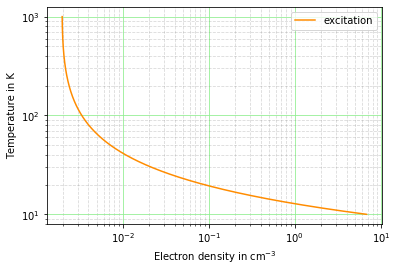

In [7]:
with quantity_support():
    plt.plot(n_e_2,T,label='excitation',c='darkorange')
    plt.xscale('log')
    plt.yscale('log')
    plt.minorticks_on()
    plt.grid(b=False, which='major', color='lightgreen', linestyle='-')
    plt.grid(b=False, which='minor', color='gray', linestyle='--',alpha=0.3)
    plt.xlabel("Electron density in cm$^{-3}$")
    plt.ylabel("Temperature in K")
    plt.legend()
    plt.savefig('prob-3-plot-2.pdf',bbox_inches='tight')

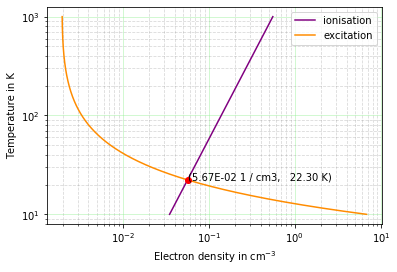

In [8]:
idx1 = np.argwhere(np.diff(np.sign(n_e_1 - n_e_2))).flatten()
idx2 = np.argwhere(np.diff(np.sign(n_e_2 - n_e_1))).flatten()
n_e0,T0 = (n_e_1[idx1]+n_e_1[idx2])/2, (T[idx1]+T[idx2])/2
with quantity_support():
    plt.plot(n_e_1,T,label='ionisation',c='purple')
    plt.plot(n_e_2,T,label='excitation',c='darkorange')
    plt.plot(n_e0,T0, 'ro')
    plt.text(n_e0,T0,'({:.2E},   {:.2f})'.format(n_e0[0],T0[0]))
    plt.xscale('log')
    plt.yscale('log')
    plt.minorticks_on()
    plt.grid(b=False, which='major', color='lightgreen', linestyle='-',alpha=0.5)
    plt.grid(b=False, which='minor', color='gray', linestyle='--',alpha=0.3)
    plt.xlabel("Electron density in cm$^{-3}$")
    plt.ylabel("Temperature in K")
    plt.legend()
    plt.savefig('prob-3-plot-3.pdf',bbox_inches='tight')

In [9]:
9.5e-12 * 1**0.6 / 2.1e-10

0.04523809523809524

In [10]:
# %matplotlib qt

In [11]:
nu0s = constants.c / (157.74e-3*units.cm)
GamR

<Quantity 6.92771731e-21 1 / s>

In [12]:
n_e0[0]

<Quantity 0.05667952 1 / cm3>

In [13]:
T0[0]

<Quantity 22.29550999 K>

In [14]:
22.27,5.7e-2

(22.27, 0.057)